**Run the below cell to increase notebook cell width**

In [40]:
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:99% !important; }</style>"))

**Authored by Aseem Sachdeva**

##  Exploratory Data Analysis, Dr. Brooks Health Data: Ten Rules for computational analyses
**Source: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007#sec004**

 **Rule # 3: Use cell divisions to make steps clear**

Rule et al. cites clear seperation of steps and duties as their third rule for constructing compelling interactive computational analyses. While it is theoretically possible to utilize a Jupter Notebook in a similar manner to other python oriented interactive development environments, such as Spyder or Pycharm, and treat each notebook cell as a single line of code, this leads to avoidable clutter, and is also cumbersome for an end user to follow programatically. Therefore, Rule et al. recommend following the software engineering principal of 'seperation of concerns' and treat each cell as a distinct step towards your end goal. I made sure to preface each new notebook cell with a boldface heading that indicated its function during the preliminary cleansing portion of the analysis(section 2), and for the cells that required deeper elaboration, I chose to preface them with a few sentences of markdown. Additionally, I included lower level code comments next to/above nearly all lines of code within each cell. By following this organizational strategy, my primary aim was to guide the end user through the analysis process in a procedural fashion. 

 **Rule # 1: Tell a story for an audience**

Rule et al. cites telling a story for an audience as their first rule for constructing compelling interactive computational analyses. Computational narratives found in Jupyter Notebooks are not dissimilar to whitepapers, essays, and other types of argumentative/persuasive writing, in the sense that they're generally created for a specific target audience. After identifying my primary end user for this notebook as Professor Brooks, I decided to choose questions that had the potential to provide insights with more relevance to him, in the event that I was ultimately able to derive an answer. Although it was possible to visualize many different aspects of this data, I believed choosing questions that were able to provide cogent physical  insights for the Professor would be most valuable. 

 **Rule # 2 Document the process, not just the results**

Rule et al. cites documenting the entire analysis process as their second rule for constructing compelling interactive computational analyses. Though it is somewhat difficult to modularize very specific, one-off analyses such as this one, I took care to write code comments on nearly all lines of code so I can refer back to this notebook it in the future for procedural guidance. In addition, though it runs the risk of over elaboration, I believe that this will ensure that any end user of this notebook will not struggle with comprehending the syntax of my code, as programming language competencies can differ vastly among audiences. Furthermore, I made sure to write all code comments in tandem with my work, largely for my own benefit, but also to avoid retroactively commenting on my code when it is less fresh in my mind. Finally, I made sure to conduct any data cleaning within the scope of this notebook, so any end user can mimic my process should they so choose. 

 **Objective**

The primary objective of this analysis was to provide the target end user(Professor Brooks) with salient health information about his summer workout regimen.  I wanted to try and choose questions to tackle that had the most potential to provide the Professor with feedback regarding his progress/growth as an athlete, and ended up deciding upon the following three:
* What does the relationship between Professor Brooks's heart rate and his time spent running look like over time?
* How economically has the Professor been running?
* What does the relationship between Professor Brooks's running speed and his time spent running look like over time?

##  Preliminary Data Cleansing

**Preliminary Cleansing Step 1: import our plotting and data cleansing dependencies**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", 999)
stravadf = pd.read_csv('strava.csv') 
stravadf.head(5) #Let's view all the fields

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,1.32,NaN,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,12.19,249.4,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,14.08,259.6,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


**Preliminary Cleansing Step 2: Check that data types are accurate**

In [42]:
stravadf.dtypes #Almost all variables seem to match its expected type, though timestamp is recognized as an object. Let's change it to date


Air Power               float64
Cadence                 float64
Form Power              float64
Ground Time             float64
Leg Spring Stiffness    float64
Power                   float64
Vertical Oscillation    float64
altitude                float64
cadence                 float64
datafile                 object
distance                float64
enhanced_altitude       float64
enhanced_speed          float64
fractional_cadence      float64
heart_rate              float64
position_lat            float64
position_long           float64
speed                   float64
timestamp                object
unknown_87              float64
unknown_88              float64
unknown_90              float64
dtype: object

In [43]:
stravadf['timestamp'] = stravadf['timestamp'].astype('datetime64[ns]') 

**Preliminary Cleansing Step 3: Check the data for NA values**

In [44]:
stravadf.isnull().sum() 
#Many of the fields contain NA values. Because of this, rather than replace them all at once, we'll replace them on a plot-by-plot basis.

Air Power               22807
Cadence                 22802
Form Power              22807
Ground Time             22802
Leg Spring Stiffness    22807
Power                   22802
Vertical Oscillation    22802
altitude                25744
cadence                    22
datafile                    0
distance                    0
enhanced_altitude          51
enhanced_speed             10
fractional_cadence         22
heart_rate               2294
position_lat              192
position_long             192
speed                   25721
timestamp                   0
unknown_87                 22
unknown_88               2294
unknown_90              22031
dtype: int64

Now that our preliminary checks are in order, we can dive into the analysis by exploring our first question.

##  Question 1: What does the relationship between Professor Brooks's heart rate while running and time look like?

Let's approach this question by first generating a violin plot, in order to better understand the probability density of the Profesor's heart rate. Then, we'll generate a general line plot, to view Professor Brooks's heart rate over the course of his summer running regimen. Since Professor Brooks only exclusively ran prior to September, we will only consider months prior to September. To filter the dataframe by month, we'll create a new 'Month of the year' column, and use boolean casting to filter the data. We'll additionally drop values from the dataframe where heart_rate= NA, as these observations are irrelevant. 

Personal intuition would suggest that Professor Brooks's overall heart rate would increase over time as he builds up his strength and endurance and increases the intensity of his runs. 

Text(0.5, 1.0, 'Heart rate(BPM) distribution by month')

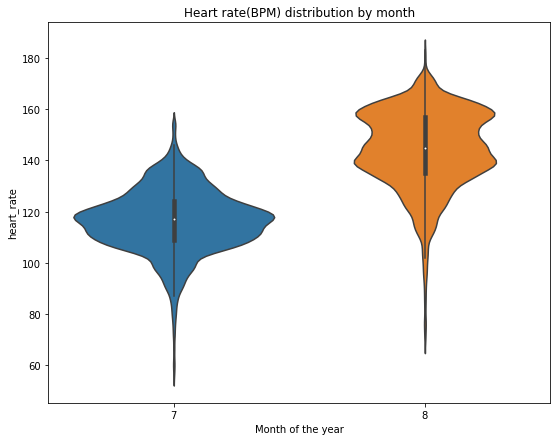

In [32]:
stravadf2 = stravadf #create a new dataframe to avoid manipulating the original dataframe. 
stravadf2['Month of the year'] =  stravadf2['timestamp'].dt.month # create month of the year column to make filtering easier
stravadf2.dropna(subset=['heart_rate'], inplace=True) # drop NA's in the heart rate column
stravadf2 = stravadf2[stravadf2['Month of the year'] < 9.0] #We'll only include months preceding September

#Now, let's create the violin plot.

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = stravadf2['Month of the year'],  y = stravadf2['heart_rate'] ).set_title('Heart rate(BPM) distribution by month') 



Based on this output, one can see that the Professor's heart rate, over the course of his running exclusive months, hovered around in the neighborhood of 115-160 beats per minute, based on the length of the black bars within the center of each violin plot. Based on the width of each violin plot, one can see that the relative likelihood of the Professor maintaining a heart rate of 120 BPM for the month of July is greatest, while in August, the probability of the Professor maintaining a heart rate of about 140 BPM and 160 BPM are greatest, and seemingly equal. One fact of note is that the Professor's median heart rate(indicated by the small white dot in the center of the plots' black bar) increases fairly substantially from July to August, from about 120 BPM to a little over 140 BPM. That being said, the entire interquartile range(the black bar itself) seems to shift upward from July to August, which seems to indicate that the Professor's cardiac strength improved rapidly over the span of only a single month. Let's generate a line plot so we can see how his heart rate fluctuates from week to week in a more nuanced manner.

Text(0.5, 1.0, 'Heart Rate vs. Time(week to week)')

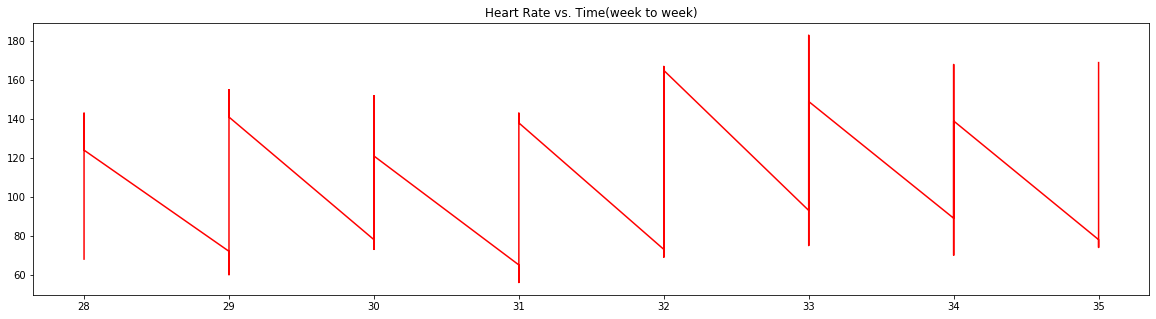

In [45]:
stravadf2['Week of the year'] =  stravadf2['timestamp'].dt.week # create week of the year column for plotting purposes
stravadf2 = stravadf2.set_index(stravadf2['Week of the year']) # set the index as Week of the year 

#Next, let's set the size of our plot and display a line graph of the Professor's heart rate over time
plt.figure(figsize=(20, 5))
plt.plot(stravadf2['Week of the year'],stravadf2['heart_rate'], 'r-', label='Heart Rate' )

plt.title('Heart Rate vs. Time(week to week)')



The erraticness of the above plot is somewhat unsurprising. It is possible that Professor Brooks maintained largely varying paces and levels of intensity throughout his runs, resulting in this widely fluctuating range of heart rates. At a glance, it appears that the highest heart rate achieved by Professor Brooks is around 180 beats per minute, while the lowest heart rate achieved by Professor Brooks is around 62 beats per minute. Although it's somewhat difficult to see, in general, the line chart seems to slant diagonally upward, suggesting that the Professor's heart rate is increasing with time. We can get a better idea of the assocation between the Professor's heart rate and time by plotting a simple regression line. To go about this, we'll bring in the datetime module, and import the date class. 

[Text(0, 0, '2019-06-30'),
 Text(0, 0, '2019-07-10'),
 Text(0, 0, '2019-07-20'),
 Text(0, 0, '2019-07-30'),
 Text(0, 0, '2019-08-09'),
 Text(0, 0, '2019-08-19'),
 Text(0, 0, '2019-08-29'),
 Text(0, 0, '2019-09-08')]

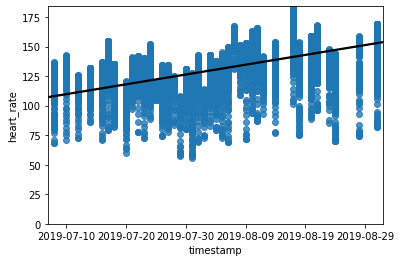

In [46]:
import datetime
from datetime import date

#Since seaborn doesn't handle dates very well, we can first create a column of ordinal dates, which will be of the data type string.
stravadf2['date_ordinal'] = pd.to_datetime(stravadf2['timestamp']).apply(lambda date: date.toordinal())

#We can now fit a regression line to a scatter plot of the data, cleaning up the x and y axes to aid in readibility and 
#mapping the ordinal date values back to datetime. Finally, we'll have our scatter plot with a fitted regression line.
ax = sns.regplot(data=stravadf2,x='date_ordinal',y='heart_rate', line_kws={'color':'black'})
ax.set_xlim(stravadf2['date_ordinal'].min() - 1, stravadf2['date_ordinal'].max() + 1)
ax.set_ylim(0, stravadf2['heart_rate'].max() + 1)


ax.set_xlabel('timestamp')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)




We can now clearly see that time is positively associated with Professor Brooks's heart rate - in other words, as time passes, Professor Brooks's heart rate increases. This supports our original hunch, which suggests that, as the Professor's strength and endurance increases, he will naturally pursue a more intense running pace in order to continue to challenge himself and avoid plateauing. It seems as if the Professor's summer regimen may very well have benefitted him over time from a cardiovascular standpoint. 

##  Question 2: Is Professor Brooks Running Economically?

One of the most important indicators of good endurance running performace is a runner's running economy, or the amount of oxygen a runner uses while on the move. More efficient runners will, naturally, use less oxygen while running at any given speed compared to their less efficient counterparts, therby allowing them to endure for a longer time. One indicator of running economy is leg spring stiffness, which measures how well a runner can recycle the energy applied to the ground with each stride. If one's leg is relatively stiff while springing up from a stride, less energy will be required to propel oneself forward. Therefore, and increase in LSS over time indicates an improvement in running economy. While leg spring stiffness is largely dependent on individual physiology, leg spring stiffness for fairly athletic people generally ranges from 6-14 kilonewtons per meter.(https://storage.googleapis.com/stryd_static_assets/stryd-metric-validation.pdf).  For this visual exploration, we'll take a look at just one of Professor Brooks's runs and visualize it using a 3D plot.   

In [47]:
import math
#As an initial step, we can convert the lat and long fields to a more normalized decimal with the formula below.
strava3 = stravadf
strava3["position_lat_degrees"] = strava3["position_lat"] * ( 180 / 2**31 )
strava3["position_long_degrees"] = strava3["position_long"] * ( 180 / 2**31 )

#We can then apply the Mercantor projection formula to the latitude column to transform it and prep it for plotting on a non-spherical surface.
def lat2y(a):
  return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))
strava3["position_lat_degrees_mercantor"]=strava3["position_lat_degrees"].apply(lat2y)
strava3['Month of the year'] =  strava3['timestamp'].dt.month

#We'll pick a session in August, since the Professor had been exclusively running during months prior, and thus was in his prime running shape.
strava3 = strava3[strava3['Month of the year'] == 8.0] 
strava3['Week of the year'] =  strava3['timestamp'].dt.week
 #Let's go with the second to last week of August.
strava3 = strava3[strava3['Week of the year'] == 34] 
strava3['Day of the month'] =  strava3['timestamp'].dt.day
#Finally, let's settle on the 23rd of August.
strava3 = strava3[strava3['Day of the month'] == 23] 
#As a final step, we'll drop all NA's from the columns below, as we'll be using these for our 3D model.
strava3.dropna(subset=['position_long_degrees', 'position_lat_degrees_mercantor', 'enhanced_altitude', 'Leg Spring Stiffness'], inplace=True)

strava3.head()






,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,position_lat_degrees,position_long_degrees,position_lat_degrees_mercantor,Month of the year,Week of the year,Day of the month
26347,0.0,55.0,41.0,974.0,0.000,172.0,0.000,NaN,73.0,activities/2803436608.fit.gz,0.00,273.2,1.903,0.0,85.0,504550164.0,-999320166.0,NaN,2019-08-23 01:24:39,0.0,100.0,NaN,42.290906,-83.762049,46.754219,8,34,23
26348,0.0,73.0,50.0,850.0,0.000,187.0,0.000,NaN,74.0,activities/2803436608.fit.gz,0.56,273.2,2.043,0.0,88.0,504550223.0,-999320300.0,NaN,2019-08-23 01:24:40,0.0,300.0,NaN,42.290911,-83.762060,46.754226,8,34,23
26349,0.0,73.0,50.0,850.0,0.000,187.0,0.000,NaN,74.0,activities/2803436608.fit.gz,2.94,273.0,2.137,0.0,96.0,504550193.0,-999320664.0,NaN,2019-08-23 01:24:41,0.0,300.0,NaN,42.290909,-83.762090,46.754223,8,34,23
26350,1.0,74.0,50.0,624.0,4.375,214.0,0.000,NaN,74.0,activities/2803436608.fit.gz,4.74,272.8,2.202,0.0,100.0,504550189.0,-999320939.0,NaN,2019-08-23 01:24:42,0.0,300.0,NaN,42.290908,-83.762113,46.754222,8,34,23
26351,1.0,74.0,56.0,538.0,5.750,228.0,9.625,NaN,73.0,activities/2803436608.fit.gz,7.50,272.8,2.258,0.0,102.0,504550111.0,-999321325.0,NaN,2019-08-23 01:24:43,0.0,300.0,NaN,42.290902,-83.762146,46.754213,8,34,23


Now that we've prepped our dataframe for plotting, let's construct a 3D plot with longitude on the x axis, latitude on the y axis, and altitude on the z axis, and examine the output to get a better idea of how efficiently the Professor is running.

Text(0.5, 0, 'Altitude')

<Figure size 432x288 with 0 Axes>

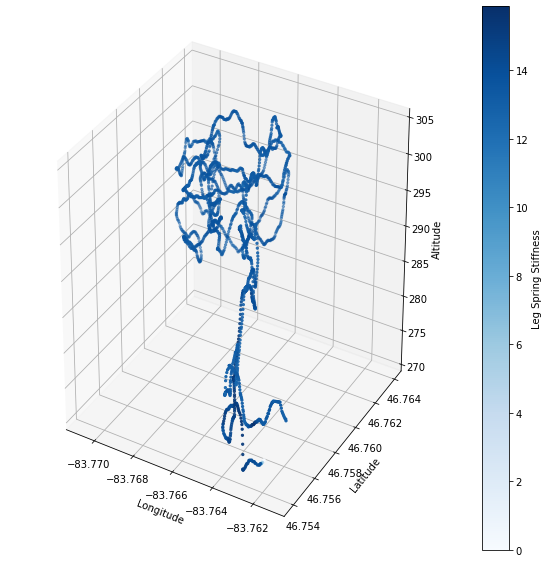

In [48]:
from mpl_toolkits.mplot3d import Axes3D #Let's bring in the Axes3D class to aid us in constructing our 3D plot.
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

#We'll plot long on the x axis, lat on the y axis, and running altitude on the z axis. Then, we'll color in the plot based on intensity of LSS.
#darker portions of the plot will indicate a higher LSS, while lighter portions will indicate a smaller LSS.
artists=ax.scatter(strava3["position_long_degrees"],strava3["position_lat_degrees_mercantor"],strava3["enhanced_altitude"],
                   s=5, c=strava3["Leg Spring Stiffness"], cmap='Blues')

#We can create a color bar to use as a legend for our reference. 
plt.colorbar(artists).set_label("Leg Spring Stiffness")


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')

While it is difficult to tell if Professor Brooks is objectively running economically, as LSS is difficult to compare across runners, one can see that his LSS generally seem to fall within the range of 6-14, as indicated by the colorbar on the right. This is a range indicative of a fairly athletic individual, according to the whitepaper posted on stryd.com(article linked in first cell of this section, retreived from this URL https://blog.stryd.com/2017/12/07/how-to-lead-the-pack-running-power-meters-quality-data/). Personal intuition would suggest that the Professor would require less effort to propel himself forward at lower elevations, and indeed, the plot is colored in the darkest shades of blue at lower altitude levels(between 270-280 meters). Furthemore, the professor's leg spring stiffness seems to decrease somewhat whenever he changes direction latitudinally. This also intuitively makes sense - in order to change direction, one has to generally stop one's momentum, change direction, and increase it again. 

##  Question 3:  What does the relationship between Professor Brook's running speed and his time spent running look like over time?

While the Professor certainly seems to have improved from an endurance standpoint over the course of his summer running regimen, it'd also be beneficial to see whether or not he has improved from a pure performance standpoint. I hypothesize, based on personal intuition, that his speed would generally improve over time as a natural side effect of his increasing muscle strength. We can approach this question similarly to question 1, by first generating a violin plot to understand the general probability density of the Professor's speed over the course of his summer running regimen, followed by a deeper, weekly dive with a line plot. Finally, we'll output a fitted regression line for a more definitive picture of the relationship between the Professor's speed and time. Prior to all that, however, we'll create a new dataframe once again to avoid manipulating any of the prior dataframes we created, and we'll restrict our months of analyses to anything prior to September, since the Professor exclusively ran prior to that point. Additionally, we'll use the enhanced speed column, and interpret it as meters per second, based on the unit dictionary provided. 

Text(0.5, 1.0, 'Speed(m/s) distribution by month')

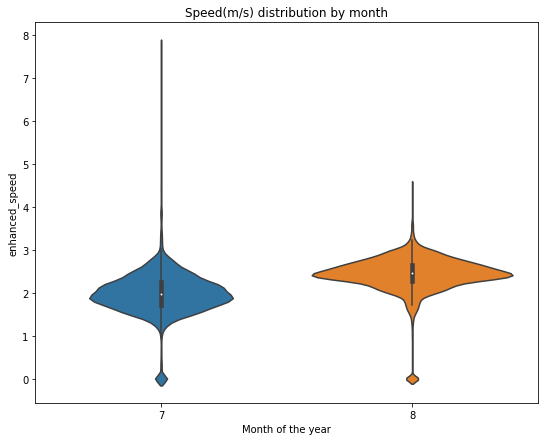

In [37]:
stravadf4 = stravadf #create a new dataframe to avoid manipulating the original dataframe, or any of the others. 
stravadf4['Month of the year'] =  stravadf4['timestamp'].dt.month # create month of the year column to make filtering easier.
stravadf4.dropna(subset=['enhanced_speed'], inplace=True) # drop NA's in the enhanced_speed column.
stravadf4 = stravadf4[stravadf4['Month of the year'] < 9.0] #We'll only include months preceding September.

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = stravadf4['Month of the year'],  y = stravadf4['enhanced_speed'] ).set_title('Speed(m/s) distribution by month') 


It appears as if the speed that Professor Brooks has the highest likelihood of maintaining for both July and August is centered around the mean, at about two meters per second and 2.5 meters per second, respectively. At a perfunctory glance, it would seem that this aspect of the Professor's physicality has not incurred nearly as dramatic a change in a single month span as his heart rate. However, when taking into account that this is just a measure of pure physical performance, an improvement of half a meter per second is a dramatic change indeed. For instance, in a hypothetical scenario where the Professor where to run for an hour straight, if he were to run his median pace from July, he'd cover a total distance of: 
- 3600seconds X 2m/s = 7200 meters
Whereas, at the Professor's median August pace, he'd cover around:
- 3600seconds X 2.5m/s = 9000 meters

Let's generate another line plot so we can view the Professor's week to week progress.

Text(0.5, 1.0, 'Speed vs. Time(week to week)')

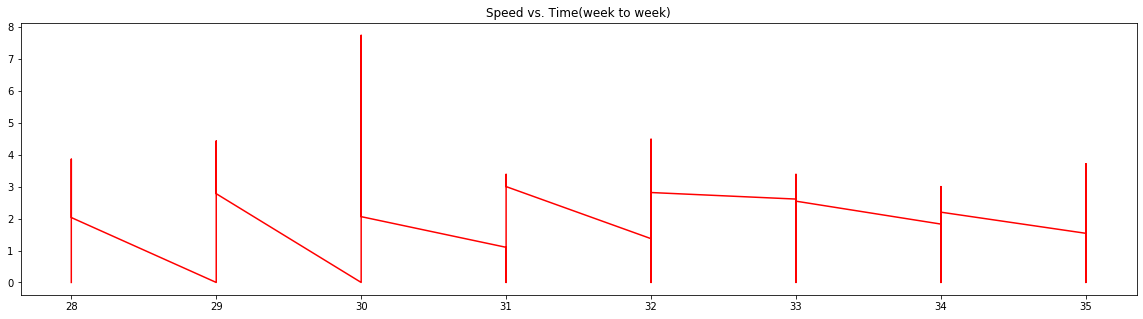

In [49]:
stravadf4['Week of the year'] =  stravadf4['timestamp'].dt.week # create week of the year column for plotting purposes
stravadf4 = stravadf4.set_index(stravadf4['Week of the year']) # set the index as Week of the year 

#Next, let's set the size of our plot and display a line graph of the Professor's enhanced speed over time
plt.figure(figsize=(20, 5))
plt.plot(stravadf4['Week of the year'],stravadf4['enhanced_speed'], 'r-', label='enhanced speed' )

plt.title('Speed vs. Time(week to week)')


While this plot is certainly not very useful in terms of visualizing the directionality of the relationship between time and the Professor's speed, the highs and lows of his pace becomes more apparant. Predictably, the Professor's slowest pace will be near zero, coinciding for times when the device was recording his pace while he was stagnant. Perhaps more illuminating are the max paces he sets from week to week. For the most part, the Professor's max pace hovers between three to four meters per second, aside from an extreme outlier value of eight meters per second in week 30(also perceivable in the July violin plot). It is conceivable that this may have coincided with a time when Professor Brooks was running at a more strenuous, sprint worthy pace, or running along terrain that was easy to traverse quickly.   

We can definitively visualize the directionality of the relationship between these two variables with a scatter plot, fitted with a regression line. We'll follow the same procedure as question 1.  

[Text(0, 0, '2019-06-30'),
 Text(0, 0, '2019-07-10'),
 Text(0, 0, '2019-07-20'),
 Text(0, 0, '2019-07-30'),
 Text(0, 0, '2019-08-09'),
 Text(0, 0, '2019-08-19'),
 Text(0, 0, '2019-08-29'),
 Text(0, 0, '2019-09-08')]

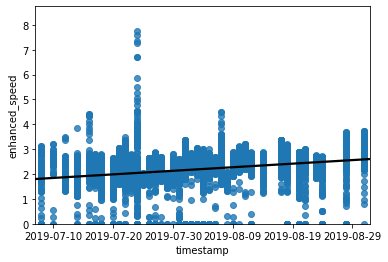

In [50]:
#Like last time, we can first create a column of ordinal dates, which will be of the data type string, since Seaborn doesn't handle dates very well
stravadf4['date_ordinal'] = pd.to_datetime(stravadf4['timestamp']).apply(lambda date: date.toordinal())

#We can now fit a regression line to a scatter plot of the data, cleaning up the x and y axes to aid in readibility and 
#mapping the ordinal date values back to datetime. Finally, we'll have our scatter plot with a fitted regression line.
ax = sns.regplot(data=stravadf4,x='date_ordinal',y='enhanced_speed', line_kws={'color':'black'})
ax.set_xlim(stravadf4['date_ordinal'].min() - 1, stravadf4['date_ordinal'].max() + 1)
ax.set_ylim(0, stravadf4['enhanced_speed'].max() + 1)


ax.set_xlabel('timestamp')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)


By plotting the fitted line, we can effectively get past the noise within the data and saliently visualize the relationship between time and the Professor's speed. Though slight, the directionality of the association between these two variables is clearly positive, indicating that Professor Brooks's speed does indeed increase over time. Once again, our original hunch is bolstered by the results of our exploration. 

##  Conclusion

Given the overall positive effect that the Professor's regimen has had in improving his cardiac capacity and physical running performance(indicated by speed), it may be safe to say that his training plan was effective in these respects, and that he can continue to train in a similar manner whenenver he desires to tackle these aspects of his physicality. 

It is worth noting that this analysis does indeed carry a few limitations with respect to its insights. For instance, while the physical metrics we explored do indeed show positive improvement with time, there is no way of definitely knowing whether or not the Professor was exerting himself to his fullest extent at any point within the timeframe captured by the data. Without any way to validate this, it isn't possible to conclusively say that the Professor has made any strides towards his peak physicality. Furthermore, standardized technology was not used to capture all of the data. In other words, multiple technological devices were used to capture different fields. It certainly may be worth calling into question the efficacy of certain health informatics devices over others, and may even be a potential launching point for additional research.  